# BIKE SHARING ASSIGNMENT

BCube is a bike-sharing system which makes bikes available for shared use to individuals on a short-terms basis for a price or free. Recently, BCube bikes suffered dips in their revenue due to the ongoing Corona pandemic. BCube is trying to understand the factors on which the demand for the shared bikes depend. 

- Find which variables are sgnificant in predicting the demand for the shared bikes
- How well those variables describe the bike demands

### Step-1 Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor



### Step-2 Reading and understanding the data

In [2]:
# read the data
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike.shape

(730, 16)

In [4]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There are no missing values and the data looks ok.

### Step-3: Visualize the data and drop the columns that are not relevant to this analysis

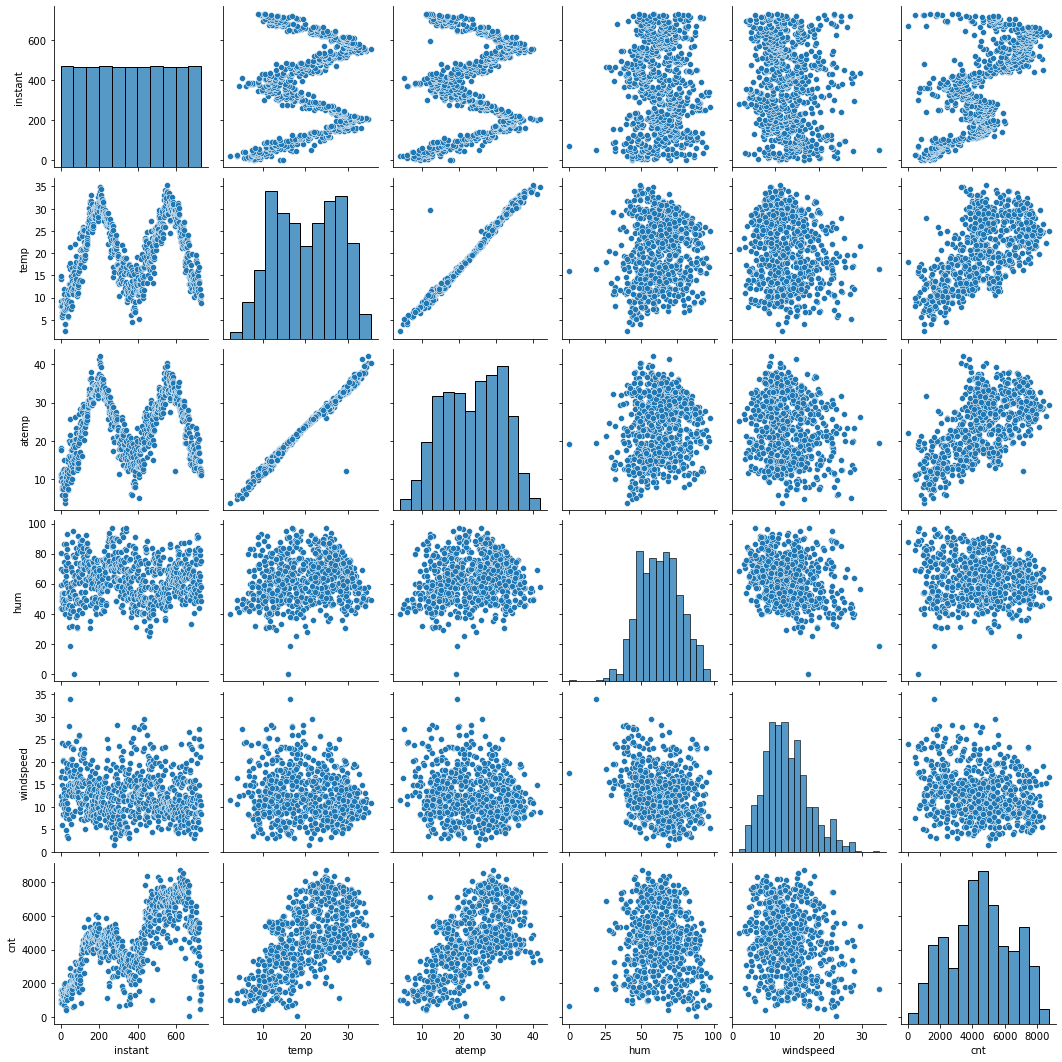

In [6]:
sns.pairplot(bike[['instant','temp','atemp','hum','windspeed','cnt']])
plt.show()

There is a positive correlation between the cnt and the variables temp, windspeed, hum. Hence, it is recommended to use linear regression. 
The distribution for "Temp" and "atemp" looks similar. Hence, we can remove either one of them. The columns instant and dteday does not have much information to provide. So, we will drop temp column from the dataset.

In [7]:
bike.drop(['instant','dteday','casual','registered','temp'],inplace=True, axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,11.46350,43.6957,12.522300,1600


## Step-4: Data preparation

Let us assign the categrorical variables number with string data. The 'mnth','season','weekday','weathersit' can be appropriately assigned with the string information.

In [8]:
bike['mnth']=bike['mnth'].map({1:'jan', 2:'feb',3:'mar',4:'apr',5:'may', 6:'jun',7:'jul',8:'aug', 9:'sep',10:'oct',11:'nov', 12:'dec'})
bike.mnth.value_counts()

may    62
jul    62
oct    62
jan    62
dec    62
mar    62
aug    62
jun    60
sep    60
nov    60
apr    60
feb    56
Name: mnth, dtype: int64

In [9]:
bike['season']=bike['season'].map({1: 'spring', 2: 'summer', 3:'fall',4:'winter'})
bike.season.value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [10]:
bike['weekday']=bike['weekday'].map({6:'sat',0:'sun',1:'mon', 2:'tue',3:'wed',4:'thu', 5:'fri'})
bike.weekday.value_counts()

tue    105
mon    105
fri    104
thu    104
wed    104
sat    104
sun    104
Name: weekday, dtype: int64

In [11]:
bike['weathersit']=bike['weathersit'].map({1: 'clear', 2:'mistcloudy', 3:'lightSnow', 4:'heavyrain'})
bike.weathersit.value_counts()

clear         463
mistcloudy    246
lightSnow      21
Name: weathersit, dtype: int64

#### Visualizing Categorical variables

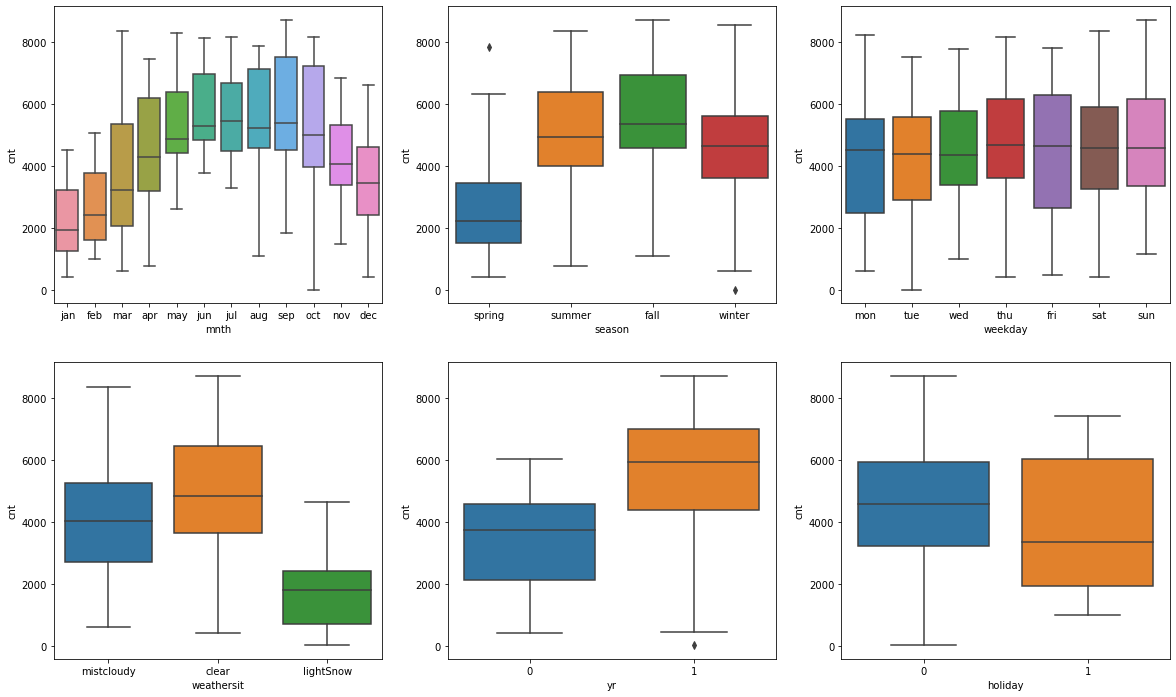

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.show()

Inferences
- a)	Jan seems to have a less demand compared to other months.
- b)	June, July, August & September have more demand compared to other months.
- c)	The demand of the bikes is high during the summer and fall season whereas less in the spring season.
- d)	The demand of the bikes is the same during weekday and weekend with slight high during Thursday.
- e)	When the weather is light snow, the demand of bikes is less. However, with clear weather, the demand is more. 
- f)	Compared to 2018, the demand for 2019 was higher.
- g)	The demand of the bike is less during holiday compared to non-holiday.



#### Create dummies for the categorical variables

In [13]:
season_dum = pd.get_dummies(bike.season, drop_first=True)
season_dum.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [14]:
mnth_dum = pd.get_dummies(bike.mnth, drop_first=True)
mnth_dum.head()

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [15]:
weekday_dum = pd.get_dummies(bike.weekday, drop_first=True)
weekday_dum.head()

,mon,sat,sun,thu,tue,wed
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [16]:
weathersit_dum = pd.get_dummies(bike.weathersit, drop_first=True)
weathersit_dum.head()

,lightSnow,mistcloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


#### Now, let us concatinate the dummies into the dataset and drop the columns which were used to create the dummies.

The dummies created are: season_dum, mnth_dum, weekday_dum, weathersit_dum 

In [17]:
bike = pd.concat([bike,season_dum,mnth_dum, weekday_dum, weathersit_dum], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
0,spring,0,jan,0,mon,1,mistcloudy,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,jan,0,tue,1,mistcloudy,17.68695,69.6087,16.652113,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,jan,0,wed,1,clear,9.47025,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,thu,1,clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,jan,0,fri,1,clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,0


In [18]:
bike.shape

(730, 33)

Drop the columns from which the dummies were created.

In [19]:
bike.drop(['season','mnth','weekday','weathersit'], axis=1, inplace=True)
bike.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
bike.shape

(730, 29)

## Step-5: Splitting the data into training and testing dataset 

In [21]:
df_train, df_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=50)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Rescale the train dataset

In [22]:
var_list = ['atemp','hum','windspeed']
scaler = MinMaxScaler()
df_train[var_list] = scaler.fit_transform(df_train[var_list])
df_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.482353,0.023529,0.698039,0.545242,0.644848,0.318203,4454.445098,0.245098,0.254902,0.250980,...,0.086275,0.064706,0.137255,0.149020,0.133333,0.145098,0.149020,0.149020,0.031373,0.341176
std,0.500179,0.151726,0.459559,0.223322,0.149640,0.167086,1941.858196,0.430568,0.436234,0.434003,...,0.281045,0.246248,0.344454,0.356457,0.340268,0.352545,0.356457,0.356457,0.174494,0.474570
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.345522,0.524581,0.197916,3068.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.556759,0.648347,0.295422,4509.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732269,0.752576,0.406471,5864.250000,0.000000,1.000000,0.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Let us visualize the correlation of the data

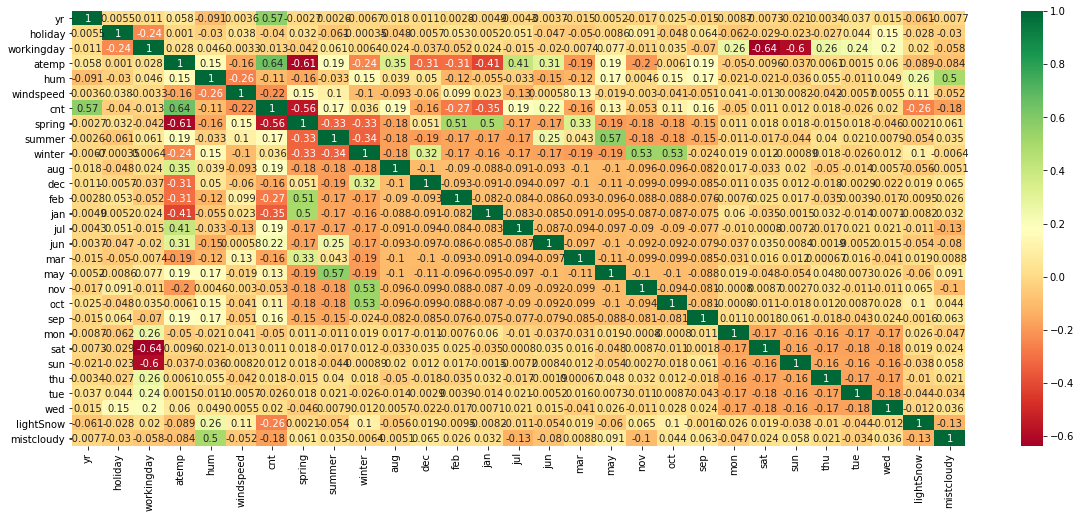

In [23]:
plt.figure(figsize=(20,8))
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.show()

The 'cnt' depedent variable has strong positive correlation with 'atemp' and 'yr'. However, 'sprint', 'jan', 'lightsnow', 'mistcloudy', 'mar', 'feb' 'dec', 'windspeed' are negatively correlated. 

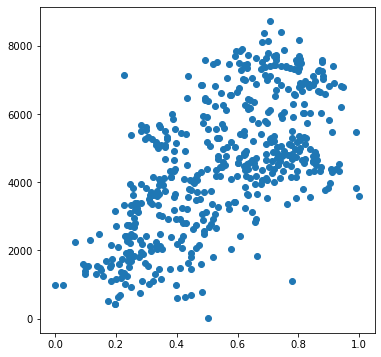

In [24]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

Dividing X & y sets for model building

In [25]:
y_train = df_train.pop('cnt')
y_train.head()

707    3228
172    4507
14     1248
204    3606
182    5119
Name: cnt, dtype: int64

In [26]:
X_train = df_train
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,aug,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
707,1,0,1,0.434610,0.933018,0.243629,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
172,0,0,1,0.858891,0.729068,0.274549,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,1,0.236172,0.513954,0.243603,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
204,0,0,1,1.000000,0.567625,0.267859,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
182,0,0,1,0.821838,0.458136,0.150755,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Step-6: Model selection using Recursive Feature Elimination (RFE)

In [27]:
X_train.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar',
       'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue', 'wed',
       'lightSnow', 'mistcloudy'],
      dtype='object')

#### Running the RFE to arrive at 15 predictor variables

In [28]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm,15)
rfe.fit(X_train, y_train)
rfe.support_

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True, False, False, False,  True,
        True])

In [29]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 8),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', True, 1),
 ('feb', False, 4),
 ('jan', False, 2),
 ('jul', False, 14),
 ('jun', False, 5),
 ('mar', False, 12),
 ('may', False, 3),
 ('nov', True, 1),
 ('oct', False, 11),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 13),
 ('tue', False, 6),
 ('wed', False, 10),
 ('lightSnow', True, 1),
 ('mistcloudy', True, 1)]

In [30]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'nov', 'sep', 'sat', 'sun', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [31]:
X_train_rfe = X_train[col]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,winter,dec,nov,sep,sat,sun,lightSnow,mistcloudy
707,1,0,1,0.434610,0.933018,0.243629,0,1,1,0,0,0,0,0,1
172,0,0,1,0.858891,0.729068,0.274549,0,0,0,0,0,0,0,0,0
14,0,0,1,0.236172,0.513954,0.243603,1,0,0,0,0,0,0,0,1
204,0,0,1,1.000000,0.567625,0.267859,0,0,0,0,0,0,0,0,0
182,0,0,1,0.821838,0.458136,0.150755,0,0,0,0,0,0,0,0,0


#### Building the model using statsmodel for detailed statistics and manual elimination to arrive at a good fit

In [32]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.2
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.14e-187
Time:                        22:27:50   Log-Likelihood:                -4112.0
No. Observations:                 510   AIC:                             8256.
Df Residuals:                     494   BIC:                             8324.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4047.2207    688.118      5.882      0.000    2695.222    5399.220
yr          2026.6731     70.203     28.869      0.000    1888.740    2164.607
holiday    -1109.2354    570.014     -1.946      0.052   -2229.186      10.715
workingday  -763.2544    623.604     -1.224      0.222   -1988.498     461.990
atemp       3742.1736    268.737     13.925      0.000    3214.165    4270.182
hum        -1718.2044    328.771     -5.226      0.000   -2364.165   -1072.243
windspeed  -1377.5628    223.600     -6.161      0.000   -1816.888    -938.238
spring     -1112.1171    132.293     -8.406      0.000   -1372.043    -852.192
winter       680.1102    122.934      5.532      0.000     438.571     921.649
dec         -451.6305    141.096     -3.201      0.001    -728.854    -174.407
nov         -534.0045    162.316     -3.290      0.001    -852.920    -215.089
sep          460.4360    146.619      3.140      0.002     172.361     748.511
sat         -582.3527    621.908     -0.936      0.350   -1804.263     639.557
sun         -518.8399    622.031     -0.834      0.405   -1740.992     703.312
lightSnow  -1778.5586    226.408     -7.856      0.000   -2223.400   -1333.717
mistcloudy  -390.1336     94.261     -4.139      0.000    -575.336    -204.931
==============================================================================
Omnibus:                       82.093   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.496
Skew:                          -0.768   Prob(JB):                     1.63e-52
Kurtosis:                       5.978   Cond. No.                         67.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
def vif(X_train_new):
    vif = pd.DataFrame()
    X = X_train_new
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [34]:
vif(X_train_rfe)

,Features,VIF
4,hum,36.83
2,workingday,35.88
3,atemp,19.80
11,sat,8.13
12,sun,7.20
5,windspeed,5.23
6,spring,3.39
7,winter,3.16
14,mistcloudy,2.52
0,yr,1.97


Since the variable 'sun' has high p-value and high VIF, we will drop it from our model.

In [35]:
X_train_rfe.drop('sun', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'nov', 'sep', 'sat', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [36]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     189.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          1.15e-188
Time:                        22:28:16   Log-Likelihood:                -4112.4
No. Observations:                 510   AIC:                             8255.
Df Residuals:                     495   BIC:                             8318.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3523.2502    280.795     12.547      0.000    2971.554    4074.946
yr          2030.7627     70.010     29.007      0.000    1893.209    2168.317
holiday     -679.6950    244.304     -2.782      0.006   -1159.695    -199.695
workingday  -250.4372    104.327     -2.401      0.017    -455.416     -45.459
atemp       3748.9725    268.531     13.961      0.000    3221.371    4276.574
hum        -1707.6081    328.424     -5.199      0.000   -2352.885   -1062.331
windspeed  -1380.7331    223.499     -6.178      0.000   -1819.857    -941.609
spring     -1107.7040    132.146     -8.382      0.000   -1367.340    -848.068
winter       678.3941    122.879      5.521      0.000     436.964     919.824
dec         -449.0591    141.019     -3.184      0.002    -726.129    -171.989
nov         -549.1754    161.244     -3.406      0.001    -865.983    -232.368
sep          463.1741    146.538      3.161      0.002     175.262     751.087
sat          -75.0578    129.863     -0.578      0.564    -330.208     180.092
lightSnow  -1776.6389    226.327     -7.850      0.000   -2221.319   -1331.959
mistcloudy  -390.7310     94.230     -4.147      0.000    -575.870    -205.592
==============================================================================
Omnibus:                       82.967   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.118
Skew:                          -0.778   Prob(JB):                     1.19e-52
Kurtosis:                       5.971   Cond. No.                         20.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
vif(X_train_rfe)

,Features,VIF
4,hum,26.78
3,atemp,15.42
2,workingday,5.94
5,windspeed,4.13
7,winter,3.00
6,spring,2.69
13,mistcloudy,2.43
11,sat,2.00
0,yr,1.95
9,nov,1.85


As the 'sat' is having high p-value, let us drop it from the model.

In [38]:
X_train_rfe.drop('sat', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'spring',
       'winter', 'dec', 'nov', 'sep', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [39]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          9.27e-190
Time:                        22:28:31   Log-Likelihood:                -4112.6
No. Observations:                 510   AIC:                             8253.
Df Residuals:                     496   BIC:                             8312.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3486.9151    273.483     12.750      0.000    2949.587    4024.243
yr          2030.7385     69.963     29.026      0.000    1893.278    2168.199
holiday     -646.2358    237.186     -2.725      0.007   -1112.250    -180.222
workingday  -210.5832     78.238     -2.692      0.007    -364.303     -56.864
atemp       3743.7597    268.199     13.959      0.000    3216.813    4270.706
hum        -1708.2990    328.201     -5.205      0.000   -2353.135   -1063.463
windspeed  -1379.6064    223.341     -6.177      0.000   -1818.417    -940.796
spring     -1109.3399    132.027     -8.402      0.000   -1368.741    -849.939
winter       677.4277    122.786      5.517      0.000     436.184     918.672
dec         -450.3873    140.906     -3.196      0.001    -727.233    -173.541
nov         -550.9490    161.107     -3.420      0.001    -867.485    -234.413
sep          466.9757    146.292      3.192      0.002     179.548     754.403
lightSnow  -1780.7192    226.065     -7.877      0.000   -2224.882   -1336.556
mistcloudy  -389.8883     94.155     -4.141      0.000    -574.880    -204.896
==============================================================================
Omnibus:                       82.965   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.294
Skew:                          -0.777   Prob(JB):                     6.62e-53
Kurtosis:                       5.982   Cond. No.                         20.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
vif(X_train_rfe)

,Features,VIF
4,hum,26.07
3,atemp,14.93
5,windspeed,4.07
2,workingday,3.50
7,winter,2.99
6,spring,2.63
12,mistcloudy,2.42
0,yr,1.95
9,nov,1.84
8,dec,1.53


As the VIF for 'hum' is 26.07, we will remove this column from the model 

In [41]:
X_train_rfe.drop('hum', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'spring', 'winter',
       'dec', 'nov', 'sep', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [42]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     208.6
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.17e-185
Time:                        22:28:49   Log-Likelihood:                -4126.1
No. Observations:                 510   AIC:                             8278.
Df Residuals:                     497   BIC:                             8333.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2654.7528    227.634     11.662      0.000    2207.509    3101.996
yr          2071.7958     71.319     29.050      0.000    1931.673    2211.919
holiday     -662.8756    243.311     -2.724      0.007   -1140.920    -184.831
workingday  -253.3940     79.821     -3.175      0.002    -410.223     -96.566
atemp       3394.8614    266.417     12.743      0.000    2871.418    3918.304
windspeed  -1056.7687    220.115     -4.801      0.000   -1489.240    -624.297
spring     -1171.6955    134.890     -8.686      0.000   -1436.720    -906.671
winter       576.6459    124.391      4.636      0.000     332.248     821.044
dec         -489.3798    144.353     -3.390      0.001    -772.997    -205.762
nov         -584.6028    165.149     -3.540      0.000    -909.079    -260.127
sep          363.3291    148.686      2.444      0.015      71.199     655.459
lightSnow  -2296.5858    208.447    -11.018      0.000   -2706.131   -1887.040
mistcloudy  -687.1306     76.800     -8.947      0.000    -838.023    -536.238
==============================================================================
Omnibus:                       87.806   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.566
Skew:                          -0.835   Prob(JB):                     7.82e-54
Kurtosis:                       5.953   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif(X_train_rfe)

,Features,VIF
3,atemp,4.83
4,windspeed,4.07
2,workingday,3.30
6,winter,2.56
0,yr,1.95
8,nov,1.80
5,spring,1.79
11,mistcloudy,1.53
7,dec,1.47
9,sep,1.14


As we have 'sep' with high p-value, we will drop this variable.

In [44]:
X_train_rfe.drop('sep', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'windspeed', 'spring', 'winter',
       'dec', 'nov', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [45]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     224.8
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          3.97e-185
Time:                        22:30:01   Log-Likelihood:                -4129.2
No. Observations:                 510   AIC:                             8282.
Df Residuals:                     498   BIC:                             8333.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2671.3568    228.665     11.682      0.000    2222.089    3120.624
yr          2068.3974     71.660     28.864      0.000    1927.604    2209.191
holiday     -623.7567    243.992     -2.556      0.011   -1103.138    -144.375
workingday  -265.4790     80.064     -3.316      0.001    -422.785    -108.173
atemp       3435.6838    267.217     12.857      0.000    2910.673    3960.695
windspeed  -1068.7776    221.156     -4.833      0.000   -1503.292    -634.263
spring     -1190.4930    135.341     -8.796      0.000   -1456.402    -924.584
winter       588.4388    124.917      4.711      0.000     343.010     833.867
dec         -515.9447    144.660     -3.567      0.000    -800.163    -231.726
nov         -621.7822    165.265     -3.762      0.000    -946.485    -297.079
lightSnow  -2283.9712    209.420    -10.906      0.000   -2695.427   -1872.515
mistcloudy  -673.6979     76.984     -8.751      0.000    -824.952    -522.444
==============================================================================
Omnibus:                       89.545   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              253.871
Skew:                          -0.845   Prob(JB):                     7.46e-56
Kurtosis:                       6.015   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif(X_train_rfe)

,Features,VIF
3,atemp,4.68
4,windspeed,4.07
2,workingday,3.29
6,winter,2.55
0,yr,1.94
8,nov,1.79
5,spring,1.78
10,mistcloudy,1.52
7,dec,1.46
1,holiday,1.11


As 'holiday' has high p-value, let us drop the variable and check 

In [47]:
X_train_rfe.drop('holiday', inplace=True, axis=1)
X_train_rfe.columns

Index(['yr', 'workingday', 'atemp', 'windspeed', 'spring', 'winter', 'dec',
       'nov', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [48]:
X_train_sm = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_sm).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     243.9
Date:                Wed, 06 Oct 2021   Prob (F-statistic):          6.30e-185
Time:                        22:30:35   Log-Likelihood:                -4132.5
No. Observations:                 510   AIC:                             8287.
Df Residuals:                     499   BIC:                             8334.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2660.3982    229.890     11.573      0.000    2208.727    3112.069
yr          2068.0207     72.056     28.700      0.000    1926.450    2209.592
workingday  -217.5342     78.267     -2.779      0.006    -371.309     -63.760
atemp       3393.2972    268.177     12.653      0.000    2866.402    3920.193
windspeed  -1092.3204    222.187     -4.916      0.000   -1528.857    -655.784
spring     -1211.1064    135.847     -8.915      0.000   -1478.010    -944.203
winter       593.4190    125.592      4.725      0.000     346.664     840.174
dec         -528.3737    145.378     -3.634      0.000    -814.001    -242.746
nov         -668.6113    165.155     -4.048      0.000    -993.097    -344.126
lightSnow  -2267.4743    210.479    -10.773      0.000   -2681.008   -1853.941
mistcloudy  -667.5623     77.372     -8.628      0.000    -819.578    -515.547
==============================================================================
Omnibus:                       89.429   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              248.545
Skew:                          -0.851   Prob(JB):                     1.07e-54
Kurtosis:                       5.967   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif(X_train_rfe)

,Features,VIF
2,atemp,4.56
3,windspeed,4.06
1,workingday,3.10
5,winter,2.55
0,yr,1.94
7,nov,1.77
4,spring,1.76
9,mistcloudy,1.52
6,dec,1.46
8,lightSnow,1.08


#### Now we see that both the p-value and the VIF are within the acceptable range. 
- We shall go ahead and predict the bike sharing with the predictor variables 
- Plot the error terms using Distplot to see the pattern

In [50]:
y_train_pred = lm.predict(X_train_sm)
y_train_pred.head()

707    5117.009077
172    5057.441352
14     1099.505192
204    5543.572903
182    5066.932130
dtype: float64

#### Residual Analysis of the train data

Let us check if the error terms are also normally distributed 

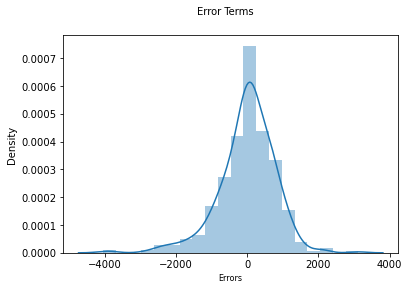

In [51]:
res = y_train-y_train_pred
fig = plt.figure()
sns.distplot(res, bins=20)
fig.suptitle('Error Terms', fontsize = 10)                  # Plot heading 
plt.xlabel('Errors', fontsize = 8)                         # X-label
plt.show()

#### Homoscedasticity

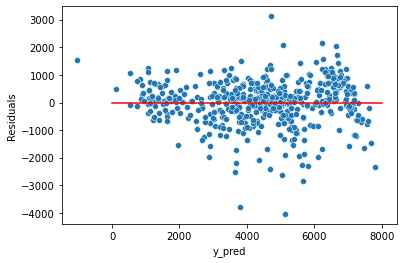

In [52]:

sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred')
plt.ylabel('Residuals')
sns.lineplot([0,8000],[0,0],color='red')
plt.show()

As we can see the check for homoscedasticity proves that there are equal variance across the regression line. 

#### No autocorrelation of residuals

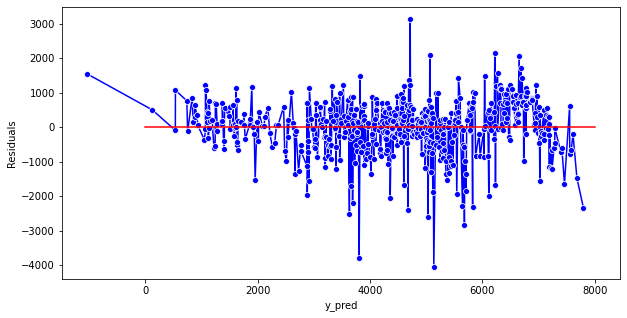

In [53]:
plt.figure(figsize=(10,5))
sns.lineplot(y_train_pred,res,marker='o',color='blue')
plt.xlabel('y_pred')
plt.ylabel('Residuals')
sns.lineplot([0,8000],[0,0],color='red')
plt.show()

The error terms are not forming any pattern and hence the model is good.

As we see that we are good with the following assumptions: 
- a) Linear relationship between X & y, 
- b) error terms are normally distributed with mean around zero 
- c) error terms are independent of each other
- d) error terms have constant variance

hence, we qualify that the model arrived is a best fit model and we can proceed with the test dataset

## Step-7: Apply the model on the test data set and validate the model robustness

In [54]:
df_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.159817,0.127854,0.164384,0.136986,0.132420,0.123288,0.022831,0.324201
std,0.499633,0.198967,0.470841,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.367276,0.334692,0.371472,0.344621,0.339723,0.329520,0.149707,0.469148
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [55]:
X_test = df_test.copy(deep=True)
X_test.shape

(219, 29)

In [56]:
df_test.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       'spring', 'summer', 'winter', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'lightSnow', 'mistcloudy'],
      dtype='object')

In [57]:
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,24.352629,63.176904,12.495316,4627.598174,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.159817,0.127854,0.164384,0.136986,0.132420,0.123288,0.022831,0.324201
std,0.499633,0.198967,0.470841,8.505412,13.605548,5.239795,1924.239131,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.367276,0.334692,0.371472,0.344621,0.339723,0.329520,0.149707,0.469148
min,0.000000,0.000000,0.000000,5.082900,30.217400,1.500244,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,17.729100,53.520800,8.750468,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,25.599150,62.217400,11.958361,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,31.219275,72.625000,15.639274,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,27.833743,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Apply the scaling on the test data set

In [58]:
X_test[var_list] = scaler.transform(df_test[var_list])
X_test.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,...,oct,sep,mon,sat,sun,thu,tue,wed,lightSnow,mistcloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.538813,0.041096,0.671233,0.570000,0.651028,0.305357,4627.598174,0.251142,0.246575,0.223744,...,0.082192,0.123288,0.159817,0.127854,0.164384,0.136986,0.132420,0.123288,0.022831,0.324201
std,0.499633,0.198967,0.470841,0.237661,0.140203,0.169255,1924.239131,0.434663,0.432005,0.417707,...,0.275286,0.329520,0.367276,0.334692,0.371472,0.344621,0.339723,0.329520,0.149707,0.469148
min,0.000000,0.000000,0.000000,0.031559,0.311386,-0.049804,801.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.384923,0.551524,0.184392,3362.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.604831,0.641141,0.288013,4590.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.761870,0.748390,0.406913,6168.000000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.064361,1.002146,0.800818,8555.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X & y 

In [59]:
y_test = X_test.pop('cnt')
y_test

333    3613
203    3285
279    4985
483    6304
267    5010
       ... 
168    5119
574    6597
535    6211
290    4748
43     1589
Name: cnt, Length: 219, dtype: int64

In [60]:
train_col_lst = X_train_rfe.columns.to_list()
train_col_lst

['yr',
 'workingday',
 'atemp',
 'windspeed',
 'spring',
 'winter',
 'dec',
 'nov',
 'lightSnow',
 'mistcloudy']

In [61]:
X_test = X_test[train_col_lst]
X_test.head()

,yr,workingday,atemp,windspeed,spring,winter,dec,nov,lightSnow,mistcloudy
333,0,1,0.324343,0.488582,0,1,0,1,0,0
203,0,1,1.013214,0.185727,0,0,0,0,0,0
279,0,0,0.594242,-0.049804,0,1,0,0,0,0
483,1,1,0.518402,0.154750,0,0,0,0,0,0
267,0,1,0.689572,0.010767,0,1,0,0,0,1


In [62]:
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,workingday,atemp,windspeed,spring,winter,dec,nov,lightSnow,mistcloudy
333,1.0,0,1,0.324343,0.488582,0,1,0,1,0,0
203,1.0,0,1,1.013214,0.185727,0,0,0,0,0,0
279,1.0,0,0,0.594242,-0.049804,0,1,0,0,0,0
483,1.0,1,1,0.518402,0.154750,0,0,0,0,0,0
267,1.0,0,1,0.689572,0.010767,0,1,0,0,0,1


In [63]:
y_test_pred = lm.predict(X_test_sm)
y_test_pred.head()

333    2934.574691
203    5678.126624
279    5324.659697
483    6100.941140
267    4696.881335
dtype: float64

### Model evaluation

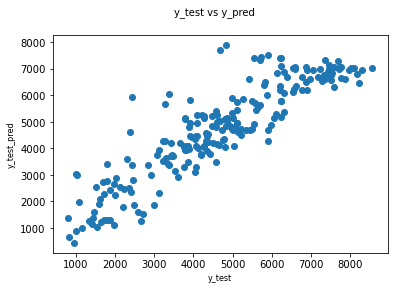

In [64]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=10)
plt.xlabel('y_test', fontsize=8)
plt.ylabel('y_test_pred', fontsize=8)
plt.show()

<AxesSubplot:ylabel='Density'>

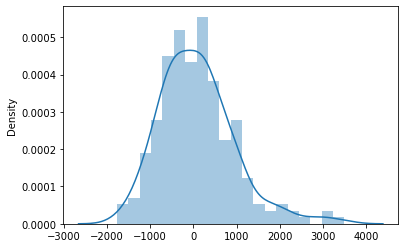

In [65]:
sns.distplot(y_test_pred-y_test,bins=20)

### Checking the r square for the train and test data using the final model. 

In [66]:
print("r-square for train dataset:",r2_score(y_train, y_train_pred))
print("r-square for test dataset:",r2_score(y_test, y_test_pred))
      

r-square for train dataset: 0.8301587862327614
r-square for test dataset: 0.7931454529309229


As we see that the difference between the train and test data is less, the model arrived is a decent model.

We can see that the equation of our best fitted line is:

$ cnt =2660.3982 + 2068.0207 \times  yr -217.5342  \times  workingday + 3393.2972 \times atemp -1092.3204 \times windspeed -1211.1064 \times spring + 593.4190 \times winter + -528.3737 \times dec -668.6113 \times nov -2267.4743 \times lightsnow  - 667.5623\times mistcloudy $


